<a href="https://colab.research.google.com/github/williammcintosh/machine_learning_projects/blob/main/CS445_GroupProject_ModelComparisons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS545 Group Project

## Saeah Go, Yifan Zhao, Will McIntosh

# Importing The Data

In [ ]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000

In [ ]:
# Downloads the dataset from my Google Drive account if necessary
if os.path.isfile("/content/bankruptcy_data.csv") == False:
  !gdown 1Ye-nQOuTRLLXg9N2AFuijvlJVsfTX7Nz
df = pd.read_csv("bankruptcy_data.csv")

Downloading...
From: https://drive.google.com/uc?id=1Ye-nQOuTRLLXg9N2AFuijvlJVsfTX7Nz
To: /content/bankruptcy_data.csv
100% 11.5M/11.5M [00:00<00:00, 35.6MB/s]


In [ ]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [ ]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

In [ ]:
notbankrupt, bankrupt = df['Bankrupt?'].value_counts()
print(f"Not Bankrupt\t= {round(notbankrupt/df.shape[0], 3)}")
print(f"Bankrupt\t= {round(bankrupt/df.shape[0], 3)}")
print(f"Shape\t\t= {df.shape}")

Not Bankrupt	= 0.968
Bankrupt	= 0.032
Shape		= (6819, 96)


# Helper Functions

Do feature selection by using recursive feature elimination (RFE).

## Test Train Split and Standardize

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from imblearn.over_sampling import RandomOverSampler

def get_data_as_train_test_split(funcDF, test_size=.2, random_state=42):

  NUMBER_OF_FEATURES = 35
  X = funcDF.drop('Bankrupt?', axis=1)
  y = funcDF['Bankrupt?']

  ros = RandomOverSampler(random_state=0)
  X, y = ros.fit_resample(X, y)

  # Use StandarScaler to standardize all numerical features,
  # so their mean and standard deviation are zero and one, respectively.
  scaler = StandardScaler()
  X[X.select_dtypes("number").columns] = scaler.fit_transform(X.select_dtypes("number"))

  # RFE with a decision tree 
  estimator = DecisionTreeClassifier(random_state=random_state)
  rfe = RFE(estimator=estimator, n_features_to_select=NUMBER_OF_FEATURES, step=1)
  rfe = rfe.fit(X, y)

  # Fit the lasso selection model
  lasso = Lasso(alpha=0.007)
  lasso = lasso.fit(X, y)

  # Make a new DataFrame called "X_rfe" that contains the RFE selected features.
  X_rfe = X.iloc[:, rfe.support_]

  # Make a new DataFrame called "X_las" that contains the Lasso selected features.
  las_selected = np.array(lasso.coef_, dtype=bool)
  X_las = X.iloc[:, las_selected]

  # Split into train and test sets
  X_train, X_test, X_rfe_train, X_rfe_test, X_las_train, X_las_test, y_train, y_test = train_test_split(
    X, X_rfe, X_las, y, 
    test_size=test_size, 
    stratify=y,
    random_state=random_state
  )

  return X_train, X_test, X_rfe_train, X_rfe_test, X_las_train, X_las_test, y_train, y_test

## Print Metrics and Features

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import learning_curve

# Fits a List of Models

In [ ]:
# Gets the test train split, separating the RFE features from the original dataset
X_train, X_test, X_rfe_train, X_rfe_test, X_las_train, X_las_test, y_train, y_test = get_data_as_train_test_split(df)

In [ ]:
print(f"X_train\t\tshape = {X_train.shape}")
print(f"X_test\t\tshape = {X_test.shape}")
print(f"X_rfe_train\tshape = {X_rfe_train.shape}")
print(f"X_rfe_test\tshape = {X_rfe_test.shape}")
print(f"X_las_train\tshape = {X_las_train.shape}")
print(f"X_las_test\tshape = {X_las_test.shape}")
print(f"y_train\t\tshape = {y_train.shape}")
print(f"y_test\t\tshape = {y_test.shape}")

X_train		shape = (10558, 95)
X_test		shape = (2640, 95)
X_rfe_train	shape = (10558, 35)
X_rfe_test	shape = (2640, 35)
X_las_train	shape = (10558, 40)
X_las_test	shape = (2640, 40)
y_train		shape = (10558,)
y_test		shape = (2640,)


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import copy

random_state = 111

# Makes a list of the names of each estimator model
clf_keys = [
  "Support Vector Machine",
  "Decision Tree",
  "Multi-layer Perceptron"
]

# Makes a list of the models
clf_values = [
  SVC(kernel="linear", random_state=random_state),
  DecisionTreeClassifier(random_state=random_state),
  MLPClassifier(random_state=random_state, max_iter=1000)
]
clf_rfe_values = copy.deepcopy(clf_values)
clf_las_values = copy.deepcopy(clf_values)

# Creates dictionaries of {names, models}
clfs = dict(zip(clf_keys, clf_values))
clfs_rfe = dict(zip(clf_keys, clf_rfe_values))
clfs_las = dict(zip(clf_keys, clf_las_values))

# Original dataset
for clf_name, clf in clfs.items():
  clf.fit(X_train, y_train)
  clfs[clf_name] = clf

# RFE Feature-selected dataset
for clf_rfe_name, clf_rfe in clfs_rfe.items():
  clf_rfe.fit(X_rfe_train, y_train)
  clfs_rfe[clf_rfe_name] = clf_rfe

# Lasso Feature-selected dataset
for clf_las_name, clf_las in clfs_las.items():
  clf_las.fit(X_las_train, y_train)
  clfs_las[clf_las_name] = clf_las

Get accuracy scores

In [ ]:
def MetricsMatrix(metric):
  # Original dataset
  metric_orig = []
  for clf_name, clf in clfs.items():
      y_pred = clf.predict(X_test)
      metric_orig.append(metric(y_test, y_pred))

  # RFE Feature selected dataset
  metric_rfe = []
  for clf_rfe_name, clf_rfe in clfs_rfe.items():
      y_rfe_pred = clf_rfe.predict(X_rfe_test)
      metric_rfe.append(metric(y_test, y_rfe_pred))

  # Lasso Feature selected dataset
  metric_las = []
  for clf_las_name, clf_las in clfs_las.items():
      y_las_pred = clf_las.predict(X_las_test)
      metric_las.append(metric(y_test, y_las_pred))
  
  return pd.DataFrame({
    "Original dataset": metric_orig,
    "RFE dataset": metric_rfe,
    "Lasso Dataset": metric_las
    }, index=clf_keys
  )

# Pearson Correlation Coefficient

## RFE

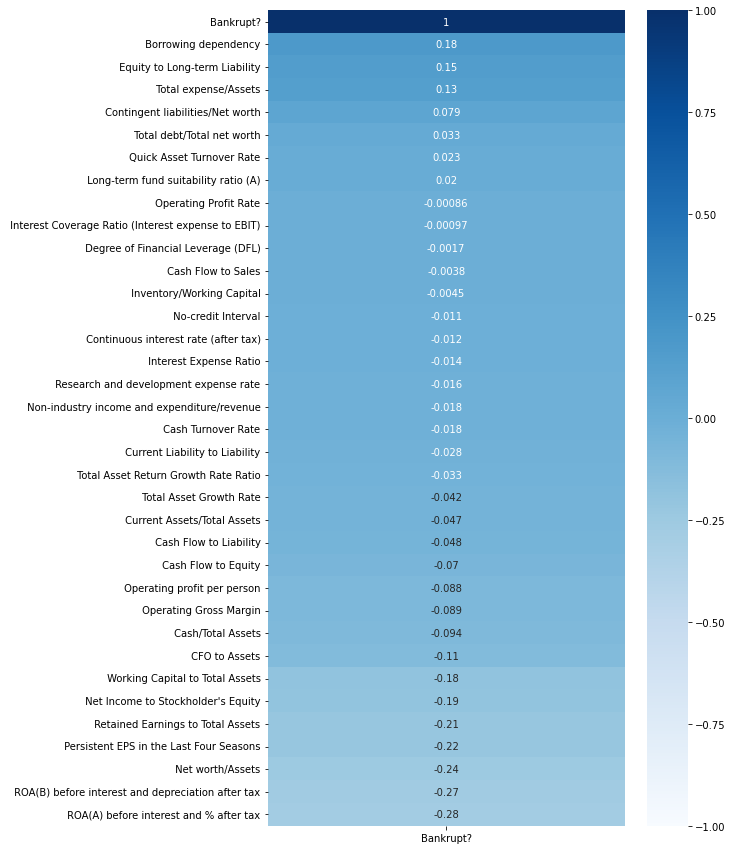

In [ ]:
import seaborn as sns

fullRFE_df = X_rfe_train
fullRFE_df["Bankrupt?"] = df['Bankrupt?']

corrs = np.array(fullRFE_df.corr().iloc[0])
plt.figure(figsize = (8,15))
sns.heatmap(
      fullRFE_df.corr()[["Bankrupt?"]].sort_values(
          by="Bankrupt?",
          ascending=False
      ), vmin=-1, vmax=1, annot=True, cmap='Blues'
  )

## Lasso

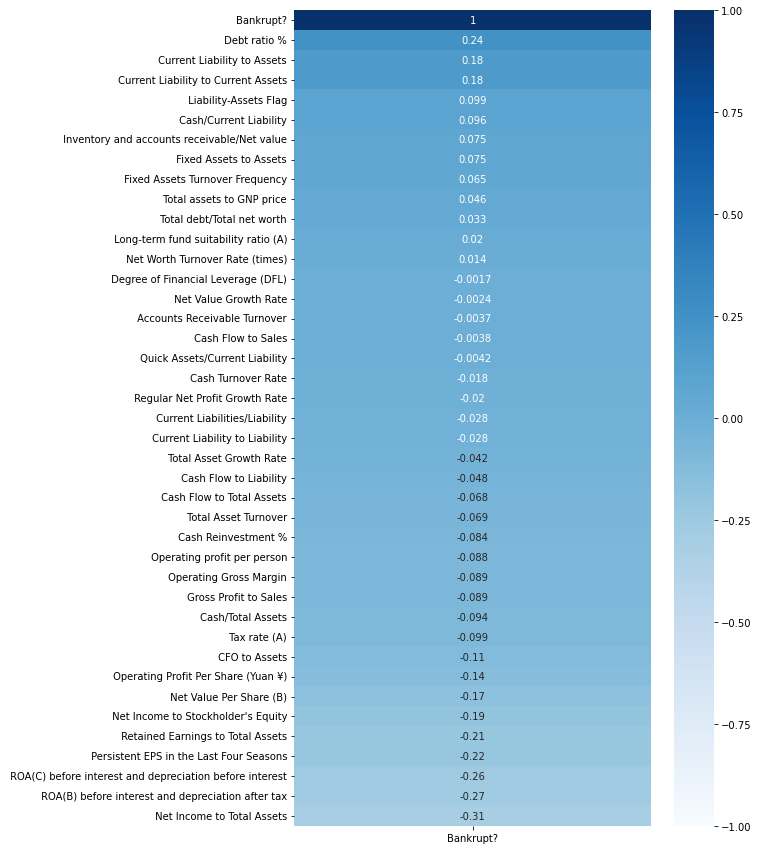

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fullLas_df = X_las_train
fullLas_df["Bankrupt?"] = df['Bankrupt?']

corrs = np.array(fullLas_df.corr().iloc[0])
plt.figure(figsize = (8,15))
sns.heatmap(
      fullLas_df.corr()[["Bankrupt?"]].sort_values(
          by="Bankrupt?",
          ascending=False
      ), vmin=-1, vmax=1, annot=True, cmap='Blues'
  )


# Metrics Scores

## Accuracy

$
\frac{TP + TN}{TP + TN + FP + FN}
$

"*What percentage of all cases are accurate?*"

In [ ]:
from sklearn.metrics import accuracy_score

print("\nACCURACY SCORES:")
MetricsMatrix(accuracy_score)


ACCURACY SCORES:


,Original dataset,RFE dataset,Lasso Dataset
Support Vector Machine,0.896591,0.881439,0.892803
Decision Tree,0.985985,0.987879,0.985985
Multi-layer Perceptron,0.986364,0.986364,0.985606


## Precision


$
\frac{TP}{TP + FP}
$

"*Of the positive predictions, how many are actually positive?*"

In [ ]:
from sklearn.metrics import precision_score

print("\nPRECISION SCORES:")
MetricsMatrix(precision_score)


PRECISION SCORES:


,Original dataset,RFE dataset,Lasso Dataset
Support Vector Machine,0.879073,0.858874,0.876543
Decision Tree,0.972734,0.976331,0.972734
Multi-layer Perceptron,0.973451,0.973451,0.972018


## Recall

$
\frac{TP}{TP + FN}
$

"*Of the positive samples, how many did the model predict as positive?*"

In [ ]:
from sklearn.metrics import recall_score


print("\nRECALL SCORES:")
MetricsMatrix(recall_score)


RECALL SCORES:


,Original dataset,RFE dataset,Lasso Dataset
Support Vector Machine,0.919697,0.912879,0.914394
Decision Tree,1.000000,1.000000,1.000000
Multi-layer Perceptron,1.000000,1.000000,1.000000


## F1 Score

$
\frac{2TP}{2TP + FP + FN}
$

"*How balanced are we between recall and precision?*"

"*Will the model predict everything positive and therefore get perfect recall? That’s great! But then the precision is terrible because it’s predicting all the negative classes as positive*"

In [ ]:
from sklearn.metrics import f1_score

print("\nF1 SCORES:")
MetricsMatrix(f1_score)


F1 SCORES:


,Original dataset,RFE dataset,Lasso Dataset
Support Vector Machine,0.898926,0.885053,0.895069
Decision Tree,0.986179,0.988024,0.986179
Multi-layer Perceptron,0.986547,0.986547,0.985810


# RFE Hyperparameter Testing

The results of the Accuracy metric was excellent after performing the RFE and Lasso feature selection, but the other metrics (precision, recall, and F1) were far worse.

To remedy this we chose to sweep through the two hyperparameters of RFE (which is `number of features`) and of Lasso (which is `alpha`) to discover which values provided the best results for all four metrics.

## RFE Sweep

In [ ]:
def Resampling(funcDF, random_state, test_size=.2):
  X = funcDF.drop('Bankrupt?', axis=1)
  y = funcDF['Bankrupt?']

  # Use StandarScaler to standardize all numerical features,
  # so their mean and standard deviation are zero and one, respectively.
  scaler = StandardScaler()
  X[X.select_dtypes("number").columns] = scaler.fit_transform(X.select_dtypes("number"))

  ros = RandomOverSampler(random_state=0)
  X, y = ros.fit_resample(X, y)

  # Split into train and test sets just for RFE
  X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=test_size, 
    stratify=y,
    random_state=random_state
  )

  return X_train, X_test, y_train, y_test

In [ ]:
def Get_RFE_Test_Train_Split(X_train, X_test, y_train, y_test, estimator, n_features):
  # RFE with a decision tree 
  #estimator = DecisionTreeClassifier(random_state=random_state)
  rfe = RFE(estimator=estimator, n_features_to_select=n_features, step=1)
  rfe = rfe.fit(X_train, y_train)

  # Transform the test dataset to contain only the RFE selected features.
  X_test = X_test.iloc[:, rfe.support_]
  X_train = X_train.iloc[:, rfe.support_]

  return X_train, X_test, y_train, y_test

In [ ]:
def TrainRFEModel(X_train, X_test, y_train, y_test, model):
  # Initialize lists of float values
  accruacy_scores = []
  precision_scores = []
  recall_scores = []
  f1_scores = []
  num_features = []
  # Iterates with a step count of 5
  for i in range(10,90,5):
    X_train_res, X_test_res, y_train_res, y_test_res = Get_RFE_Test_Train_Split(X_train, X_test, y_train, y_test, model, n_features=i)
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test_res)
    # Store values into each metric
    accruacy_scores.append(accuracy_score(y_test_res, y_pred))
    precision_scores.append(precision_score(y_test_res, y_pred))
    recall_scores.append(recall_score(y_test_res, y_pred))
    f1_scores.append(f1_score(y_test_res, y_pred))
    num_features.append(i)

  return pd.DataFrame({
      "num_features": num_features,
      "Accuracies": accruacy_scores,
      "Precisions": precision_scores,
      "Recalls": recall_scores,
      "F1's":f1_scores
  })

## Perform RFE Sweep with SVC

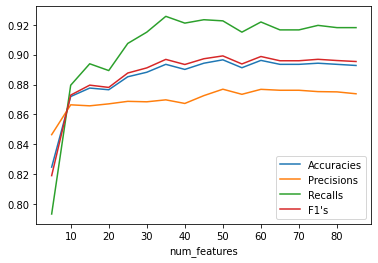

In [ ]:
random_state=42

X_train, X_test, y_train, y_test = Resampling(df, random_state)
svc = SVC(kernel="linear", random_state=random_state)
metrics_df = TrainRFEModel(df, svc)
metrics_df.set_index('num_features').plot()

## Lasso Sweep

In [ ]:
def Get_Lasso_Test_Train_Split(X_train, X_test, y_train, y_test, alpha):
  # Fit the lasso selection model
  lasso = Lasso(alpha=alpha)
  lasso = lasso.fit(X_train, y_train)

  # Transform the test dataset to contain only the Lasso selected features.
  las_selected = np.array(lasso.coef_, dtype=bool)

  X_test_res = X_test.iloc[:, las_selected]
  X_train_res = X_train.iloc[:,las_selected]

  return X_train_res, X_test_res, y_train, y_test

In [ ]:
def TrainLassoModel(X_train, X_test, y_train, y_test, model):
  # Initialize lists of float values
  accruacy_scores = []
  precision_scores = []
  recall_scores = []
  f1_scores = []
  alpha = []
 
  # Iterates with a step count of 0.001
  for i in np.arange(0.001,0.03,0.001):
    X_train_res, X_test_res, y_train_res, y_test_res = Get_Lasso_Test_Train_Split(X_train, X_test, y_train, y_test, alpha=i)
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test_res)
    # Store values into each metric
    accruacy_scores.append(accuracy_score(y_test_res, y_pred))
    precision_scores.append(precision_score(y_test_res, y_pred))
    recall_scores.append(recall_score(y_test_res, y_pred))
    f1_scores.append(f1_score(y_test_res, y_pred))
    alpha.append(i)

  return pd.DataFrame({
      "alpha": alpha,
      "Accuracies": accruacy_scores,
      "Precisions": precision_scores,
      "Recalls": recall_scores,
      "F1's":f1_scores
  })

## Perform Lasso Sweep

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.251e+00, tolerance: 2.640e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


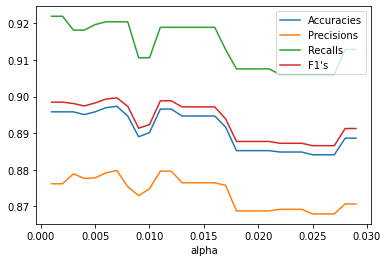

In [ ]:
X_train, X_test, y_train, y_test = Resampling(df, random_state)
svc = SVC(kernel="linear", random_state=random_state)
metrics_df = TrainLassoModel(X_train, X_test, y_train, y_test, svc)
metrics_df.set_index('alpha').plot()